# 설치 기준 정립 계획
1. 모델 독립 변수 중요도를 기반으로 예상 단속건수에 큰 영향을 미친 독립 변수들 확인
2. 전체 독립 변수들에 대해 상관계수 및 p-value 측정
3. 측정한 값들을 기반으로 큰 중요도를 가진 변수가 종속변수(y)에 어떻게 영향을 미치는지 확인
4. 1~3 과정을 기반으로 얻은 정보를 기반으로 CCTV 설치 기준 정립

## 1. 변수 중요도 추출

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
import pickle

In [67]:
with open('model.pkl', 'rb') as file:
    rf_model = pickle.load(file)
# 모델 불러오기

In [68]:
df = pd.read_csv('종합학습데이터프레임.csv')
df = df.drop('단속장소',axis=1)
df = pd.DataFrame(data=rf_model.feature_importances_,index=df.columns)
df.columns = ['변수중요도']
df = df.sort_values('변수중요도',ascending=False)

In [69]:
best_features = df[df['변수중요도']>=0.05].index
# 5%이상의 중요도를 갖는 변수 이름 추출

In [70]:
best_features

Index(['서울시광진구대규모점포인허가정보.csv', '서울특별시 광진구_가로등 위치정보_20220214.csv',
       '서울시광진구체육도장업인허가정보.csv', '서울시광진구골프연습장업인허가정보.csv', '서울시광진구미용업인허가정보.csv',
       '서울시광진구휴게음식점인허가정보.csv'],
      dtype='object')

---
## 2. 전체 독립변수 상관계수 확인

In [71]:
df = pd.read_csv('종합학습데이터프레임.csv')
df = df[df.columns[:31]]

In [72]:
df.columns

Index(['서울시광진구골프연습장업인허가정보.csv', '서울시광진구공연장인허가정보.csv', '서울시광진구관광숙박업인허가정보.csv',
       '서울시광진구노래연습장업인허가정보.csv', '서울시광진구단란주점영업인허가정보.csv', '서울시광진구당구장업인허가정보.csv',
       '서울시광진구대규모점포인허가정보.csv', '서울시광진구동물병원인허가정보.csv', '서울시광진구목욕장업인허가정보.csv',
       '서울시광진구미용업인허가정보.csv', '서울시광진구민방위대피시설인허가정보.csv', '서울시광진구병원인허가정보.csv',
       '서울시광진구세탁업인허가정보.csv', '서울시광진구수영장업인허가정보.csv', '서울시광진구숙박업인허가정보.csv',
       '서울시광진구안전상비의약품판매업소인허가정보.csv', '서울시광진구약국인허가정보.csv',
       '서울시광진구영화상영관인허가정보.csv', '서울시광진구외국인관광도시민박업인허가정보.csv',
       '서울시광진구유흥주점영업인허가정보.csv', '서울시광진구의원인허가정보.csv', '서울시광진구일반음식점인허가정보.csv',
       '서울시광진구제과점영업인허가정보.csv', '서울시광진구집단급식소식품판매업인허가정보.csv',
       '서울시광진구집단급식소인허가정보.csv', '서울시광진구체육도장업인허가정보.csv', '서울시광진구휴게음식점인허가정보.csv',
       'cctv위치', '단속장소', '서울특별시 광진구_공영주차장 정보_20220118.csv',
       '서울특별시 광진구_가로등 위치정보_20220214.csv'],
      dtype='object')

---

**p-value 및 상관계수 측정**

In [73]:
import scipy.stats  as stats
plt.rcParams['font.family'] = 'Nanumgothic'
# 한글 폰트 설정
spearman_corr = stats.spearmanr(df['단속장소'], df['cctv위치'])

In [74]:
columns_dict = {}
for i in df.columns.drop('단속장소'):
    columns_dict[i] = stats.spearmanr(df['단속장소'],df[i])
    stat_df = pd.DataFrame(columns_dict).T
stat_df.columns = ['corr','p_value']

In [75]:
high_corr_list =list(stat_df.index)
# 분포 확인 대상 열 저장

---
**분포 시각화**

In [76]:
plt.rcParams['axes.unicode_minus'] = False

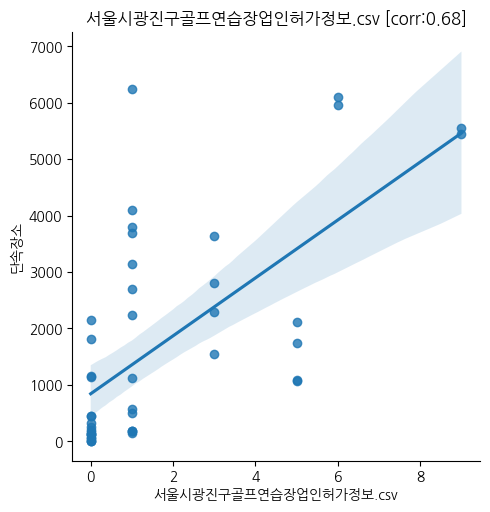

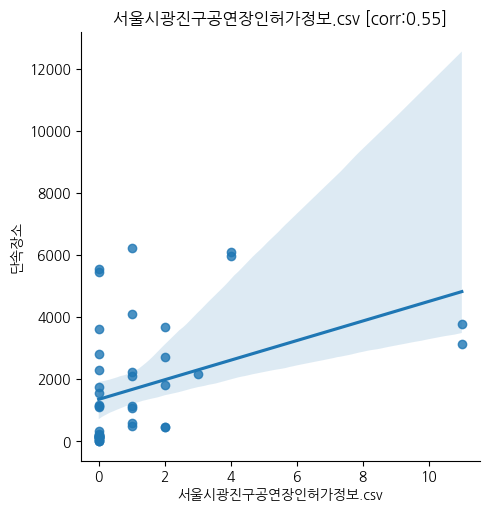

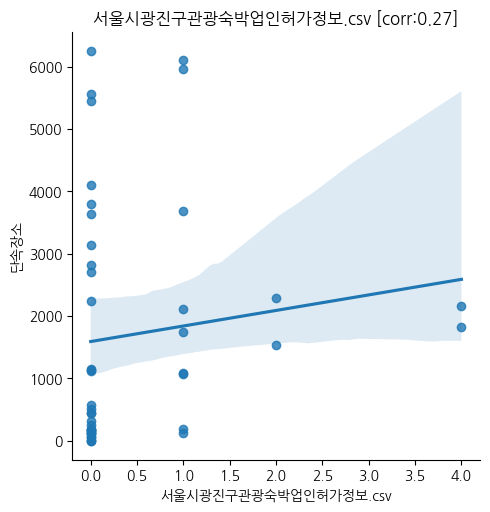

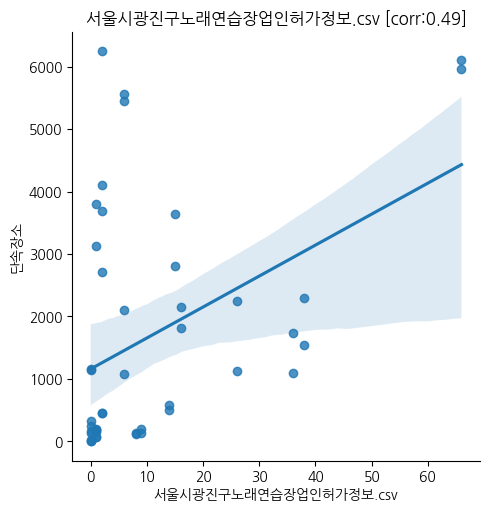

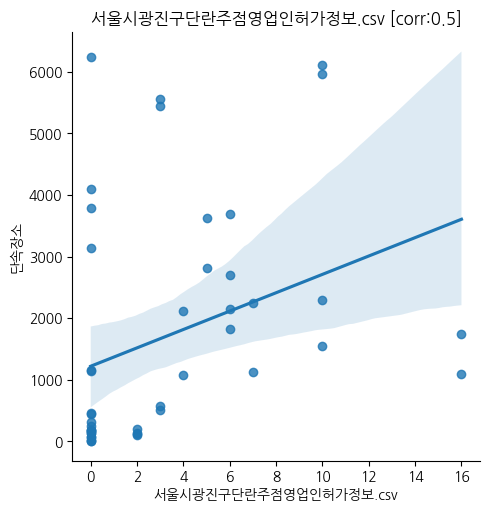

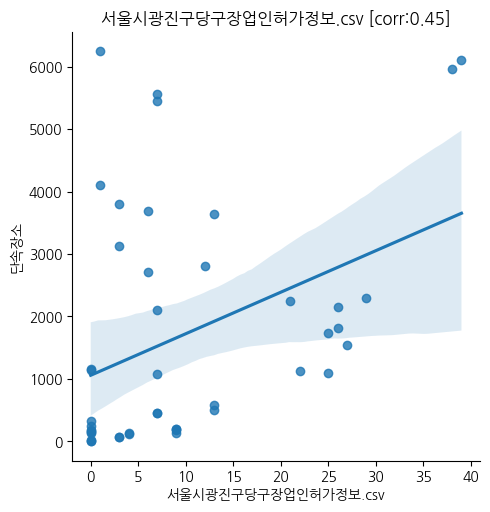

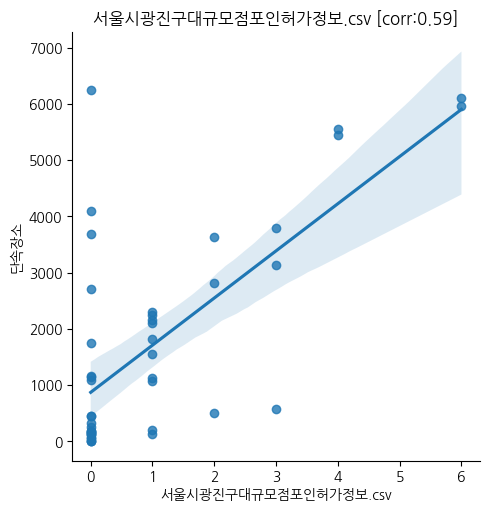

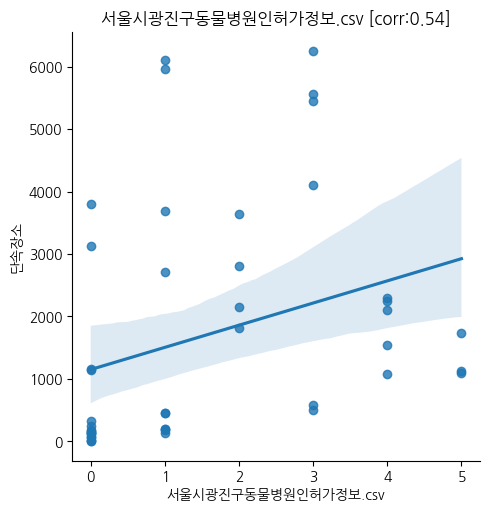

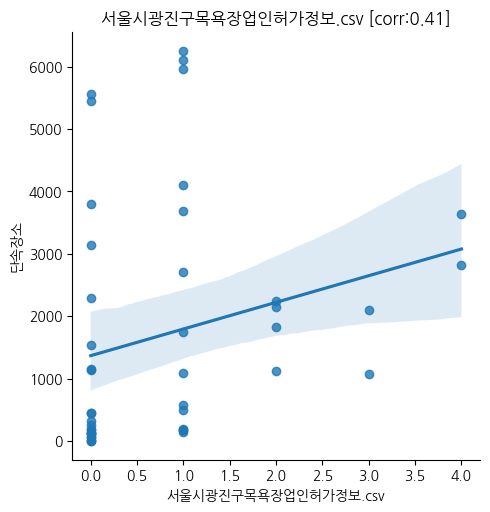

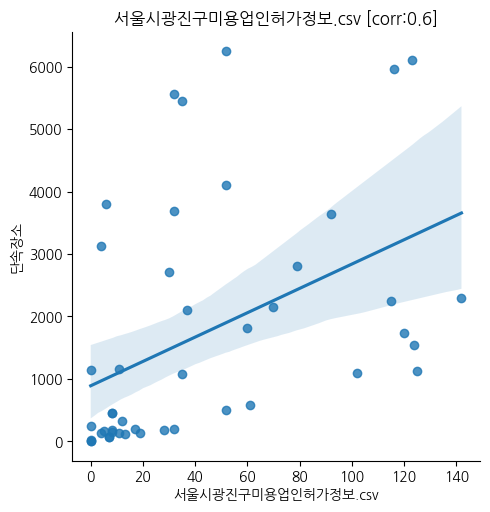

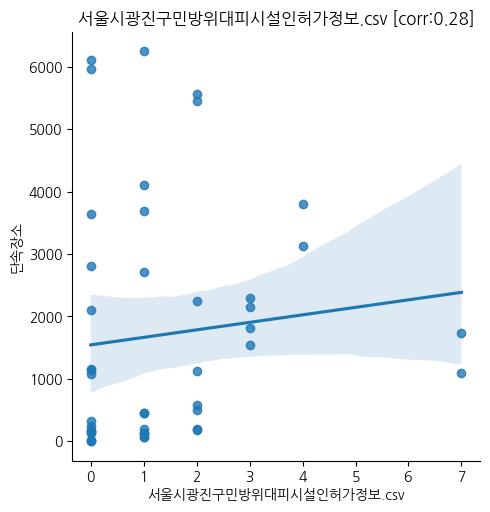

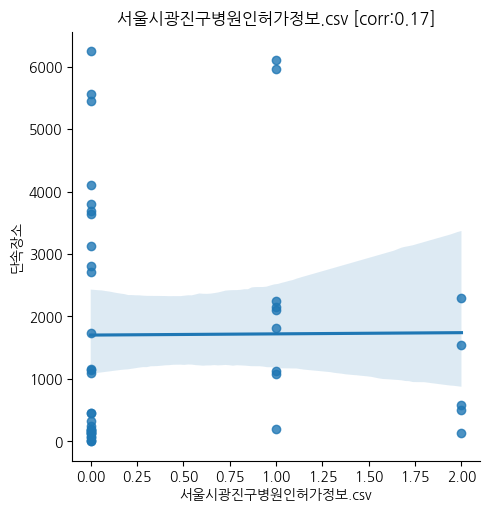

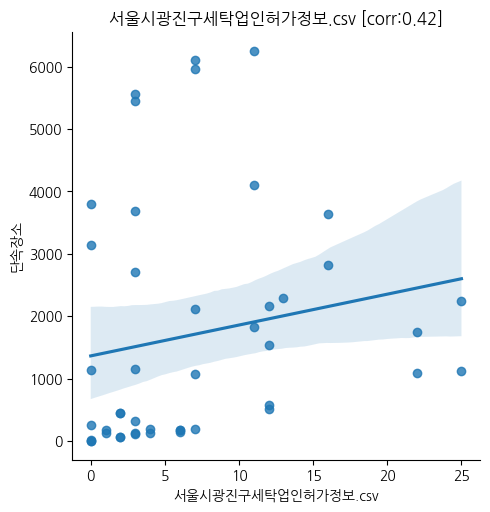

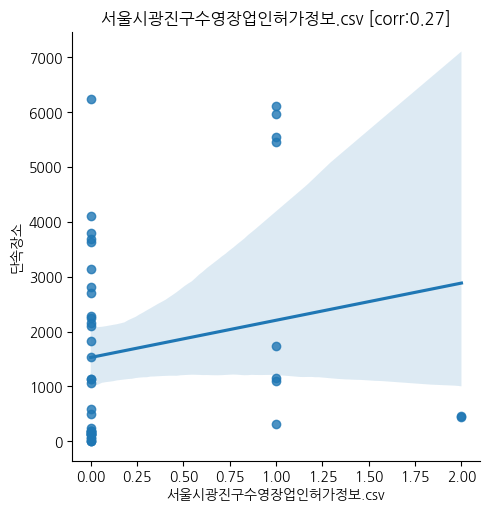

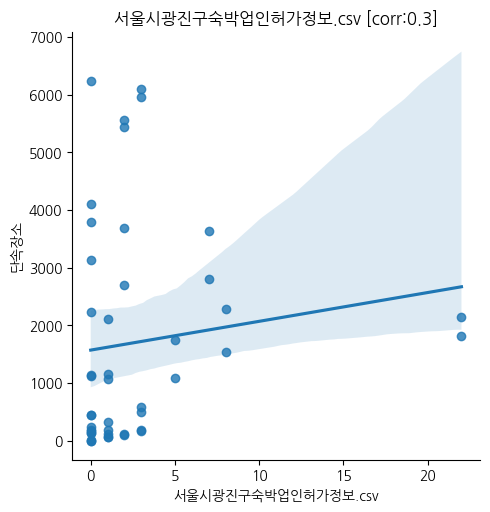

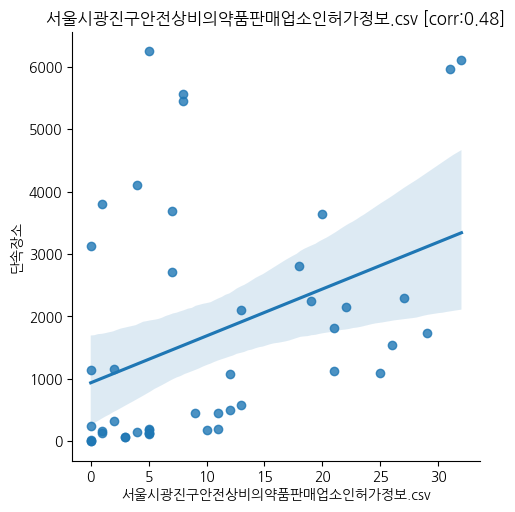

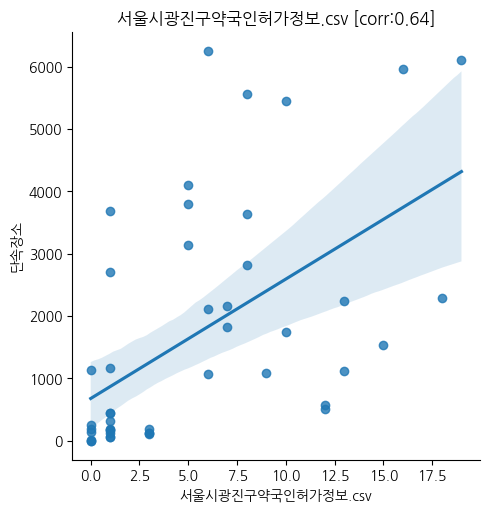

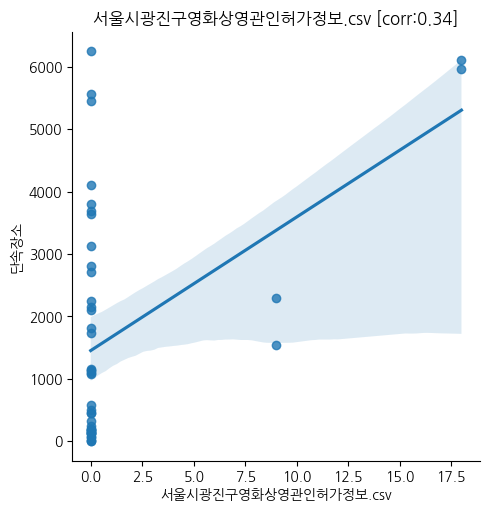

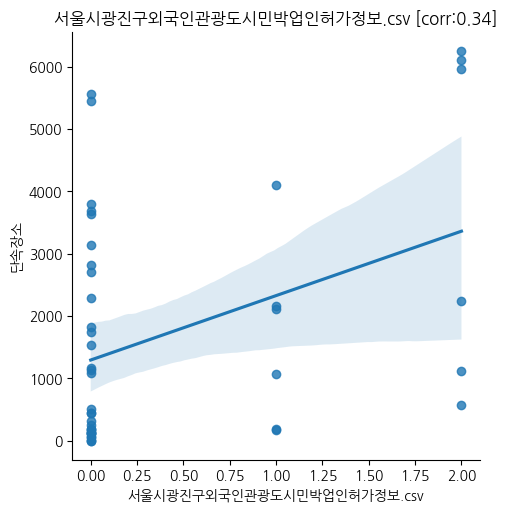

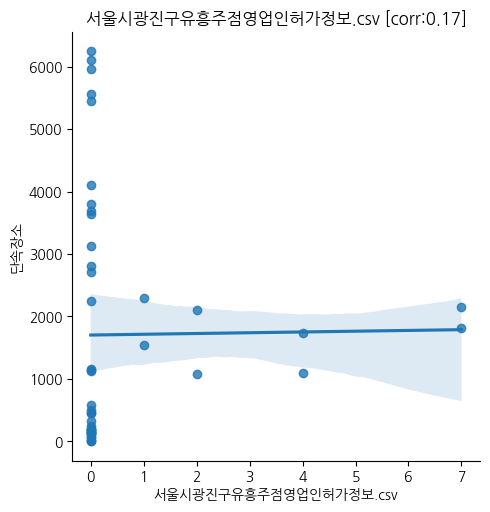

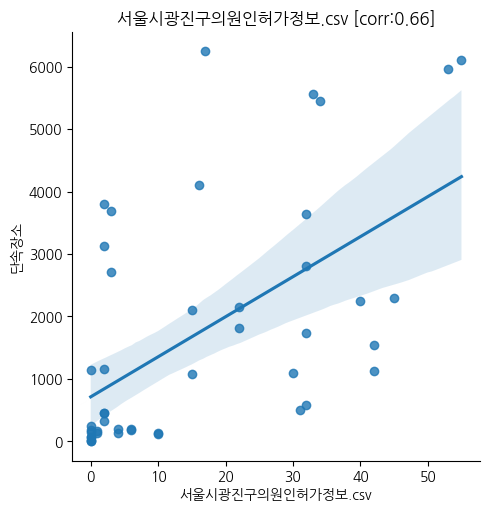

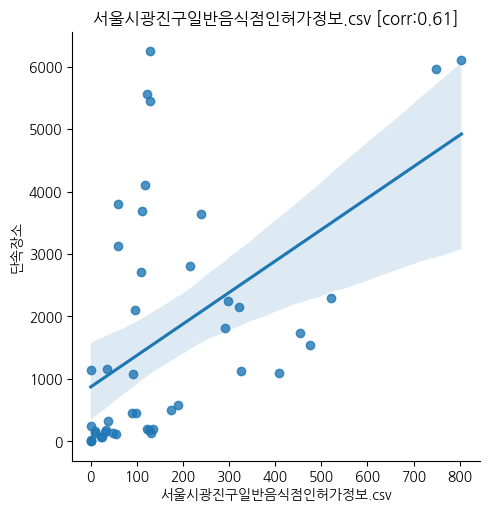

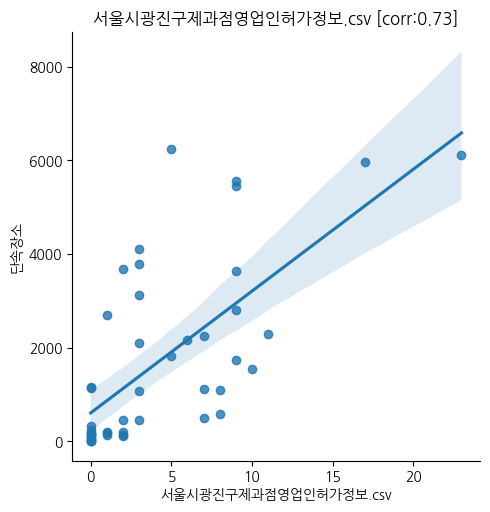

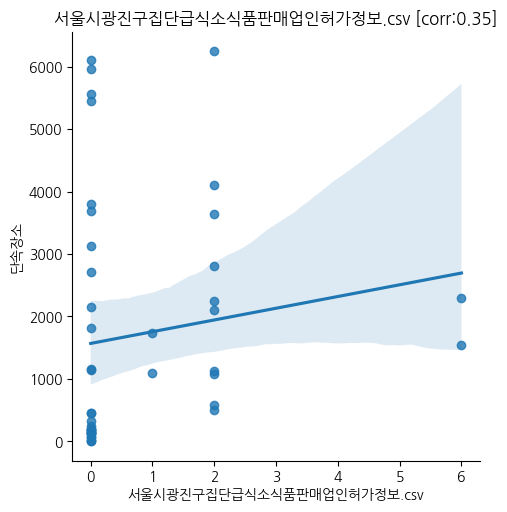

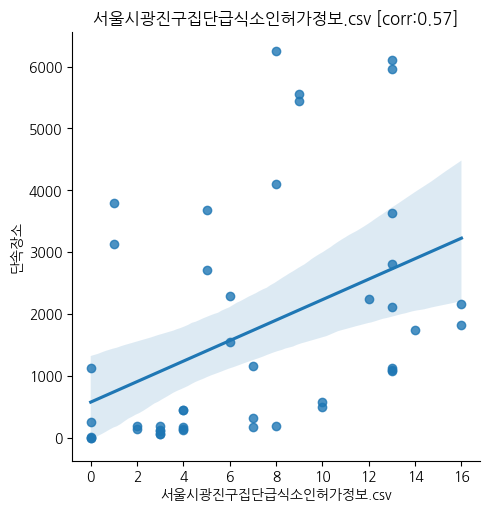

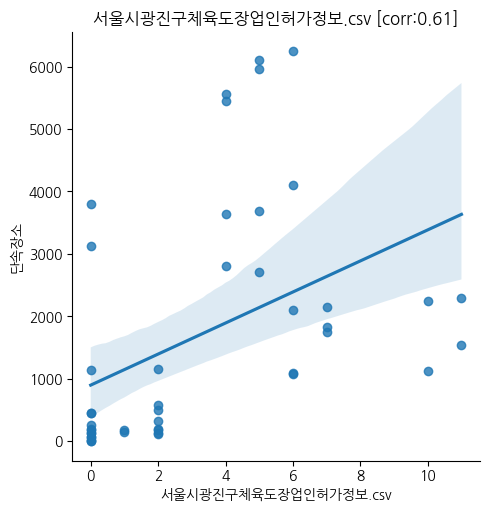

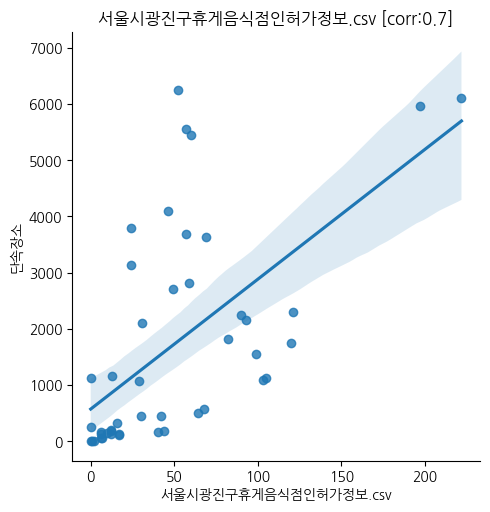

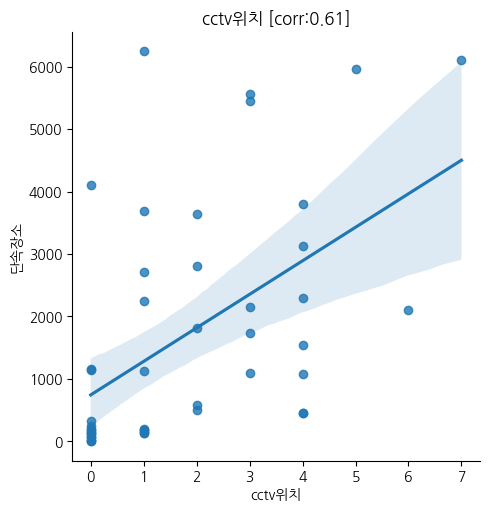

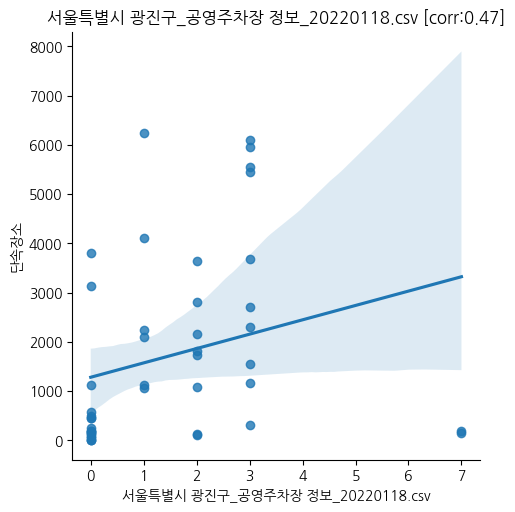

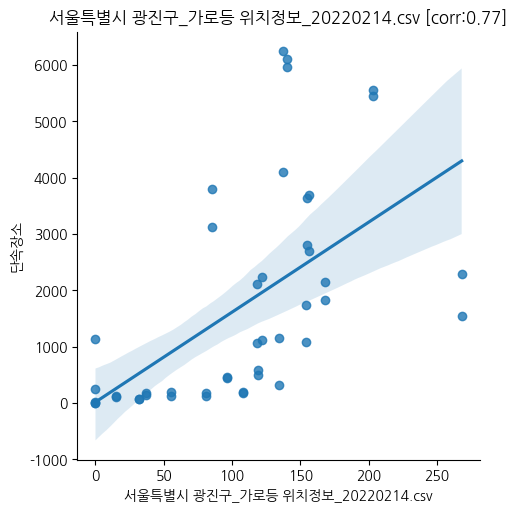

In [77]:
def draw_kde(data,y_v,x_v):
    sns.lmplot(x=x_v,y=y_v,data=data,order=1)
    plt.title(f'{x_v} [corr:{np.round(stat_df.loc[x_v,"corr"],2)}]')
    return plt.show()
for i in high_corr_list:
    draw_kde(df,'단속장소',i)

# 3. 모델 주요 독립 변수들의 상관계수 확인

In [83]:
stat_df.loc[best_features,:]

,corr,p_value
서울시광진구대규모점포인허가정보.csv,0.585062,2.433126e-05
서울특별시 광진구_가로등 위치정보_20220214.csv,0.772611,5.060059e-10
서울시광진구체육도장업인허가정보.csv,0.609798,8.724726e-06
서울시광진구골프연습장업인허가정보.csv,0.679895,2.798822e-07
서울시광진구미용업인허가정보.csv,0.604104,1.113249e-05
서울시광진구휴게음식점인허가정보.csv,0.698679,9.447793e-08


# 4. 결과
- 모든 변수들이 유의한 p-value를 가지고 있으며 상관계수 역시 지나치게 낮다고 보기 어렵다.
- 양의 상관계수를 모두 가지고 있으므로 각 변수들이 모두 모인 지역에 CCTV를 설치하는 것이 적절하다.
- 따라서 해당 변수들을 지도에 시각화 함으로써 CCTV 후보지를 선정한다면 모델의 예측 단속건수 달성에 가장 근접한 결과를 도출할 수 있을 것이다.

---

In [84]:
columns_candidate = best_features

In [86]:
import pickle

with open('columns_candidate.pkl', 'wb') as file:
        pickle.dump(columns_candidate, file)